# THIS NOTEBOOK CONTAINS THE LEARNING, TESTS, AND TRAILS CONDUCTED FOR UNDERSTANDING THE PROJECT

## GENERAL IMPORTS

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('darkgrid')
plt.style.use('dark_background')

## READING TRAINING DATA (X_TRAIN)

In [5]:
df = pd.read_csv('Dataset/training_set_features.csv')
df.select_dtypes('object').head()

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,NaN,NaN
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",NaN,NaN
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb


## FEATURE ENGINEERING - Training Set

In [7]:
to_drop = ['census_msa', 'employment_industry', 'employment_occupation', 'rent_or_own']
df.drop(to_drop, axis=1, inplace=True)

In [8]:
edu_map = {"< 12 Years":1,
           "12 Years":2,
           "Some College":3,
           "College Graduate":4}

df.education = df.education.replace(edu_map)

In [9]:
object_cols = df.select_dtypes('object')
object_cols.head()

,age_group,race,sex,income_poverty,marital_status,employment_status,hhs_geo_region
0,55 - 64 Years,White,Female,Below Poverty,Not Married,Not in Labor Force,oxchjgsf
1,35 - 44 Years,White,Male,Below Poverty,Not Married,Employed,bhuqouqj
2,18 - 34 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Employed,qufhixun
3,65+ Years,White,Female,Below Poverty,Not Married,Not in Labor Force,lrircsnp
4,45 - 54 Years,White,Female,"<= $75,000, Above Poverty",Married,Employed,qufhixun


In [10]:
df.age_group.value_counts()

age_map = {"35 - 44 Years" : 2,
           "18 - 34 Years" : 1,
           "45 - 54 Years" : 3,
           "55 - 64 Years" : 4,
           "65+ Years": 5}

df.age_group = df.age_group.replace(age_map)
df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,age_group,education,race,sex,income_poverty,marital_status,employment_status,hhs_geo_region,household_adults,household_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,4,1.0,White,Female,Below Poverty,Not Married,Not in Labor Force,oxchjgsf,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,2,2.0,White,Male,Below Poverty,Not Married,Employed,bhuqouqj,0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,4.0,White,Male,"<= $75,000, Above Poverty",Not Married,Employed,qufhixun,2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,5,2.0,White,Female,Below Poverty,Not Married,Not in Labor Force,lrircsnp,0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3,3.0,White,Female,"<= $75,000, Above Poverty",Married,Employed,qufhixun,1.0,0.0


In [11]:
df.race.value_counts()

race_map = {"White":4,
            "Black":3,
            "Hispanic":2,
            "Other or Multiple":1}
df.race = df.race.replace(race_map)
df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,age_group,education,race,sex,income_poverty,marital_status,employment_status,hhs_geo_region,household_adults,household_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,4,1.0,4,Female,Below Poverty,Not Married,Not in Labor Force,oxchjgsf,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,2,2.0,4,Male,Below Poverty,Not Married,Employed,bhuqouqj,0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,4.0,4,Male,"<= $75,000, Above Poverty",Not Married,Employed,qufhixun,2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,5,2.0,4,Female,Below Poverty,Not Married,Not in Labor Force,lrircsnp,0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3,3.0,4,Female,"<= $75,000, Above Poverty",Married,Employed,qufhixun,1.0,0.0


In [12]:
male_series = pd.get_dummies(df.sex, drop_first=True).astype('int32')
df['Male'] = male_series
df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,education,race,sex,income_poverty,marital_status,employment_status,hhs_geo_region,household_adults,household_children,Male
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,4,Female,Below Poverty,Not Married,Not in Labor Force,oxchjgsf,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,2.0,4,Male,Below Poverty,Not Married,Employed,bhuqouqj,0.0,0.0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4,Male,"<= $75,000, Above Poverty",Not Married,Employed,qufhixun,2.0,0.0,1
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,2.0,4,Female,Below Poverty,Not Married,Not in Labor Force,lrircsnp,0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3.0,4,Female,"<= $75,000, Above Poverty",Married,Employed,qufhixun,1.0,0.0,0


In [13]:
df.drop('sex', axis=1, inplace=True)
df.income_poverty.value_counts()

inc_map = {"<= $75,000, Above Poverty" : 3,
           "> $75,000":2,
           "Below Poverty":1}

df.income_poverty = df.income_poverty.replace(inc_map)
df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,age_group,education,race,income_poverty,marital_status,employment_status,hhs_geo_region,household_adults,household_children,Male
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,4,1.0,4,1.0,Not Married,Not in Labor Force,oxchjgsf,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,2,2.0,4,1.0,Not Married,Employed,bhuqouqj,0.0,0.0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,4.0,4,3.0,Not Married,Employed,qufhixun,2.0,0.0,1
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,5,2.0,4,1.0,Not Married,Not in Labor Force,lrircsnp,0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3,3.0,4,3.0,Married,Employed,qufhixun,1.0,0.0,0


In [14]:
df.marital_status.value_counts()
marital_series = pd.get_dummies(df.marital_status, drop_first=True).astype('int32')
df['Marital_Status'] = marital_series
df.drop('marital_status', axis=1, inplace=True)
df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,age_group,education,race,income_poverty,employment_status,hhs_geo_region,household_adults,household_children,Male,Marital_Status
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,4,1.0,4,1.0,Not in Labor Force,oxchjgsf,0.0,0.0,0,1
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,2,2.0,4,1.0,Employed,bhuqouqj,0.0,0.0,1,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,4.0,4,3.0,Employed,qufhixun,2.0,0.0,1,1
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,5,2.0,4,1.0,Not in Labor Force,lrircsnp,0.0,0.0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3,3.0,4,3.0,Employed,qufhixun,1.0,0.0,0,0


In [15]:
df.employment_status.value_counts()

emp_map = {"Employed":3,
           "Not in Labor Force":2,
           "Unemployed":1}

df.employment_status = df.employment_status.replace(emp_map)
df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,age_group,education,race,income_poverty,employment_status,hhs_geo_region,household_adults,household_children,Male,Marital_Status
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,4,1.0,4,1.0,2.0,oxchjgsf,0.0,0.0,0,1
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,2,2.0,4,1.0,3.0,bhuqouqj,0.0,0.0,1,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,4.0,4,3.0,3.0,qufhixun,2.0,0.0,1,1
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,5,2.0,4,1.0,2.0,lrircsnp,0.0,0.0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3,3.0,4,3.0,3.0,qufhixun,1.0,0.0,0,0


In [16]:
df.hhs_geo_region.value_counts(ascending=True)

hhs_map = {"dqpwygqj":1,
           "atmpeygn":2,
           "lrircsnp":3,
           "mlyzmhmf":4,
           "bhuqouqj":5,
           "kbazzjca":6,
           "oxchjgsf":7,
           "qufhixun":8,
           "fpwskwrf":9,
           "lzgpxyit":10}

df.hhs_geo_region = df.hhs_geo_region.replace(hhs_map)
df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,age_group,education,race,income_poverty,employment_status,hhs_geo_region,household_adults,household_children,Male,Marital_Status
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,4,1.0,4,1.0,2.0,7,0.0,0.0,0,1
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,2,2.0,4,1.0,3.0,5,0.0,0.0,1,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,4.0,4,3.0,3.0,8,2.0,0.0,1,1
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,5,2.0,4,1.0,2.0,3,0.0,0.0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3,3.0,4,3.0,3.0,8,1.0,0.0,0,0


In [17]:
df.set_index('respondent_id', inplace=True)

In [18]:
df.columns[df.isna().any()]

Index(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'education',
       'income_poverty', 'employment_status', 'household_adults',
       'household_children'],
      dtype='object')

In [19]:
null_fill = {"behavioral_outside_home" : 0,
"behavioral_antiviral_meds" : 0,
"opinion_xyz_vacc_effective" : 4,
"behavioral_face_mask" : 0,
"behavioral_wash_hands" : 1,
"behavioral_large_gatherings" : 0,
"opinion_seas_risk": 2,
"opinion_seas_sick_from_vacc" : 1,
"behavioral_avoidance" : 1,
"opinion_xyz_sick_from_vacc" : 2,
"doctor_recc_xyz" : 0,
"opinion_seas_vacc_effective" : 4,
"opinion_xyz_risk" : 2,
"doctor_recc_seasonal" : 0,
 "xyz_concern" : 2, 
"xyz_knowledge" : 1, 
"chronic_med_condition" : 0,
"behavioral_touch_face" : 1,
"child_under_6_months" : 0,
"employment_status" : 3,
"health_insurance" : 1,
"health_worker" : 0,
"household_adults" : 1,
"household_children" : 0,
"income_poverty" : 3,
"education" : 4}

df.fillna(null_fill, inplace=True)

## READING TRAINING DATA (Y_TRAIN)

In [21]:
target = pd.read_csv('Dataset/training_set_labels.csv')
target.set_index('respondent_id', inplace=True)
target.head()

,xyz_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


# EDA

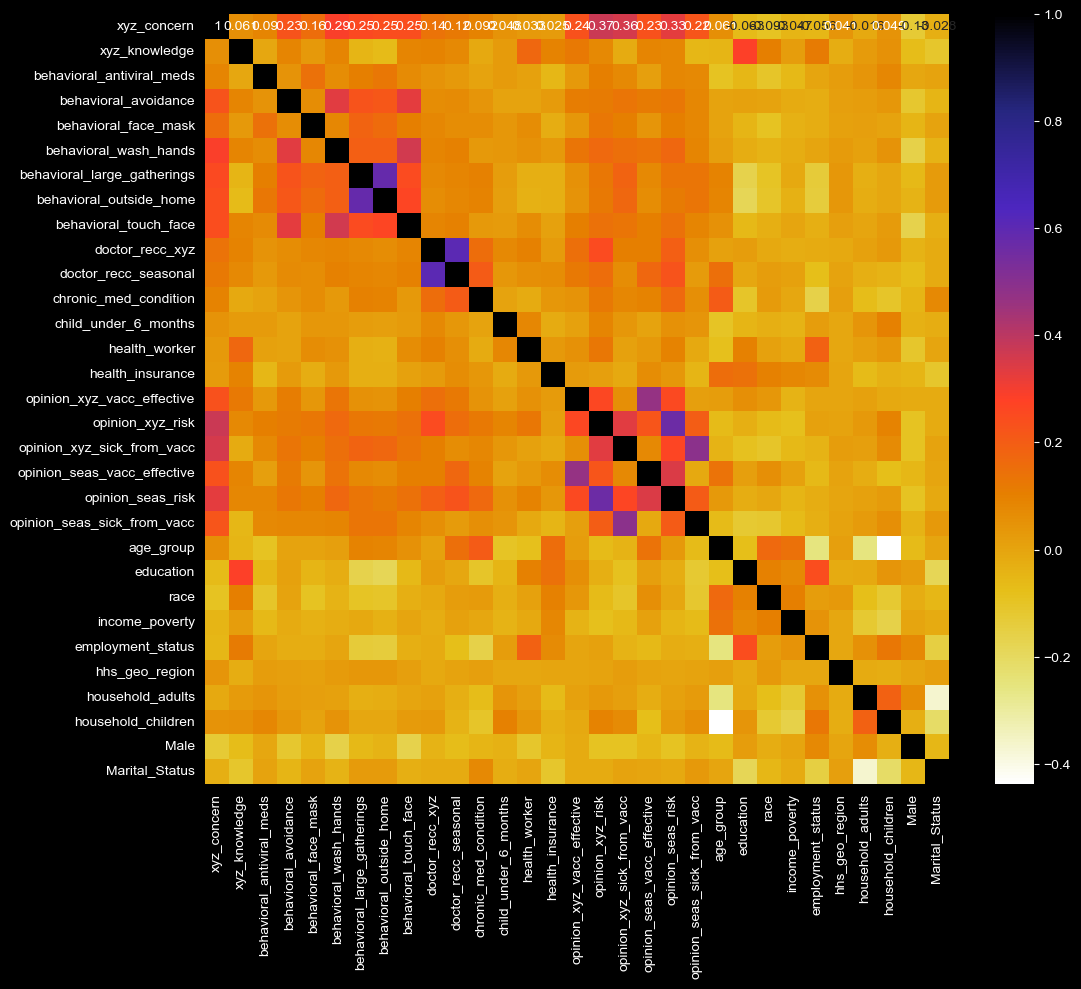

In [23]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [24]:
def correlation(data, thresh):
    corr_col = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > thresh :
                colname = corr_matrix.columns[i]
                corr_col.add(colname)
    return corr_col

In [25]:
corr_features = correlation(df, 0.5)
len(set(corr_features))
corr_features

{'behavioral_outside_home', 'doctor_recc_seasonal', 'opinion_seas_risk'}

In [26]:
df.drop('behavioral_outside_home', axis=1, inplace=True)

## SEPARATING XYZ VACCINE AND SEASONAL VACCINE DATASET

In [28]:
uniqueFeature_seas = ["opinion_seas_risk", "opinion_seas_sick_from_vacc", "opinion_seas_vacc_effective", "doctor_recc_seasonal"]
uniqueFeature_xyz = ["opinion_xyz_vacc_effective", "opinion_xyz_sick_from_vacc", "doctor_recc_xyz", "opinion_xyz_risk", "xyz_concern",
                     "xyz_knowledge"]

df_xyz = df.drop(uniqueFeature_seas, axis=1)
df_seas = df.drop(uniqueFeature_xyz, axis=1)

target_xyz = target.xyz_vaccine
target_seas = target.seasonal_vaccine

# TRAINING MODEL FOR XYZ VACCINE

### LOGISTIC REGRESSION

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_xyz = scaler.fit_transform(df_xyz)

X_train_xyz, X_test_xyz, y_train_xyz, y_test_xyz = train_test_split(df_xyz, target_xyz, test_size = 0.33)
log_mod = LogisticRegression(max_iter=200, penalty='l2')
log_mod.fit(X_train_xyz, y_train_xyz)

LogisticRegression(max_iter=200)

In [32]:
log_mod.score(X_test_xyz, y_test_xyz)

0.8283412752439301

### CHOOSING LOGISTIC REGRESSION AS THE DESIRED MODEL

In [34]:
pred_y = log_mod.predict(X_test_xyz)
probability = log_mod.predict_proba(X_test_xyz)[:,1]

### IMPROVING ACCURACY

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test_xyz, pred_y))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      6921
           1       0.67      0.40      0.50      1893

    accuracy                           0.83      8814
   macro avg       0.76      0.67      0.70      8814
weighted avg       0.81      0.83      0.81      8814



In [37]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test_xyz, probability)
roc_auc = auc(false_positive_rate, true_positive_rate)

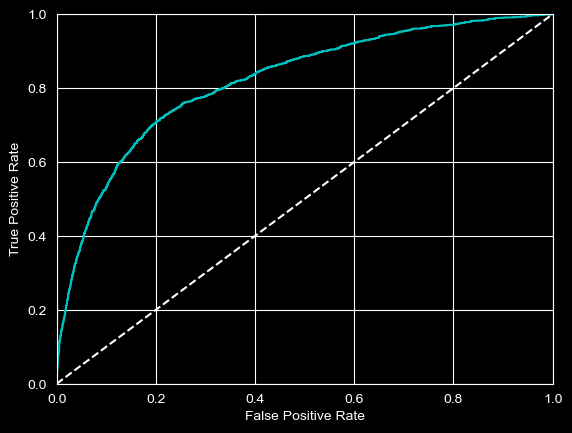

In [38]:
plt.plot(false_positive_rate, true_positive_rate, 'c', label = 'AUC = %0.3f' % roc_auc)
plt.plot([0, 1], [0, 1],'w--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [39]:
auc_value_xyz = roc_auc_score(y_test_xyz, pred_y, average='macro')
auc_value_xyz

0.6725193381222677

In [40]:
from sklearn.model_selection import GridSearchCV

parameter_grid_logistic_regression = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'max_iter':[20, 50, 100, 200, 500, 1000]}]

logistic_model_grid = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=parameter_grid_logistic_regression,
    scoring = 'accuracy',
    cv=10
)

logistic_model_grid.fit(X_train_xyz, y_train_xyz)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid=[{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']},
                         {'max_iter': [20, 50, 100, 200, 500, 1000]}],
             scoring='accuracy')

In [41]:
logistic_model_grid.best_params_

{'solver': 'newton-cg'}

## TEST OUTPUT

In [43]:
d = {"Probability":probability, "XYZ_Vaccine":pred_y}

output_xyz = pd.DataFrame(data=d)
output_xyz.head()

,Probability,XYZ_Vaccine
0,0.017298,0
1,0.118884,0
2,0.073736,0
3,0.084605,0
4,0.723665,1


## APPLYING LOGISTIC REGRESSION TO SEASONAL VACCINE

In [45]:
scaler_seas = StandardScaler()
df_seas = scaler_seas.fit_transform(df_seas)

X_train_seas, X_test_seas, y_train_seas, y_test_seas = train_test_split(df_seas, target_seas, test_size=0.33)

In [46]:
log_mod_seas = LogisticRegression(max_iter = 200, penalty='l2')
log_mod_seas.fit(X_train_seas, y_train_seas)

LogisticRegression(max_iter=200)

In [47]:
log_mod_seas.score(X_test_seas, y_test_seas)

0.7710460630814613

In [48]:
pred_seas_array = log_mod_seas.predict(X_test_seas)
pred_seas_prob_array = log_mod_seas.predict_proba(X_test_seas)[:,1]

db = {"Probability":pred_seas_prob_array, "SEAS_Vaccine":pred_seas_array}
output_seas = pd.DataFrame(data=db)
output_seas.head()

,Probability,SEAS_Vaccine
0,0.144762,0
1,0.531254,1
2,0.194934,0
3,0.819596,1
4,0.088757,0


In [49]:
auc_value_seas = roc_auc_score(y_test_seas, pred_seas_array, average="macro")
auc_value_seas

0.7674798644152129

## MY_SCORE

In [51]:
(auc_value_xyz + auc_value_seas) / 2

0.7199996012687403